In [1]:
!pip install transformers
!pip install HugsVision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 8.2 MB/s eta 0:00:00ta 0:00:01


In [2]:
from warnings import filterwarnings
filterwarnings(action="ignore")
import os
import shutil
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, load_img, img_to_array

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.style.use("ggplot")

2024-03-15 15:28:07.403711: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 15:28:07.403811: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 15:28:07.518691: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
face_cropped_link = "/kaggle/input/utkface-new/UTKFace"

data = {"images":[], "age":[], "gender":[]}

for images in os.listdir(face_cropped_link):
    data["age"].append(images.split("_")[0])
    data["gender"].append(images.split("_")[1])
    data["images"].append(os.path.join(face_cropped_link, images))

df = pd.DataFrame(data)

print(df.shape)

df.head()

(23708, 3)


,images,age,gender
0,/kaggle/input/utkface-new/UTKFace/26_0_2_20170...,26,0
1,/kaggle/input/utkface-new/UTKFace/22_1_1_20170...,22,1
2,/kaggle/input/utkface-new/UTKFace/21_1_3_20170...,21,1
3,/kaggle/input/utkface-new/UTKFace/28_0_0_20170...,28,0
4,/kaggle/input/utkface-new/UTKFace/17_1_4_20170...,17,1


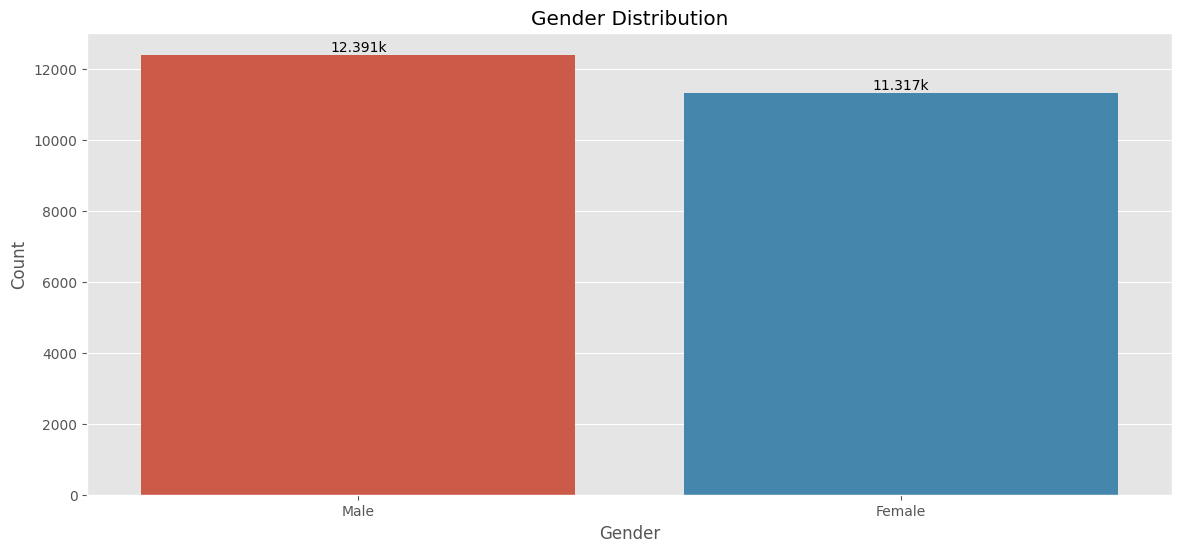

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))

countplot = sns.countplot(data=df, x="gender", ax=ax)

for p in countplot.patches:
    h = p.get_height()
    countplot.text(p.get_x()+(p.get_width()/2), h, f"{h/1000:}k", ha="center", va="bottom")

countplot.set_xlabel("Gender")
countplot.set_ylabel("Count")
countplot.set_xticklabels(labels=["Male", "Female"])
countplot.set_title("Gender Distribution")
plt.show()

In [11]:
for i in ["age", "gender"]:
    df[i] = df[i].astype("int")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  23708 non-null  object
 1   age     23708 non-null  int64 
 2   gender  23708 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 555.8+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,23708.0,33.303484,19.886112,1.0,23.0,29.0,45.0,116.0
gender,23708.0,0.477349,0.499497,0.0,0.0,0.0,1.0,1.0


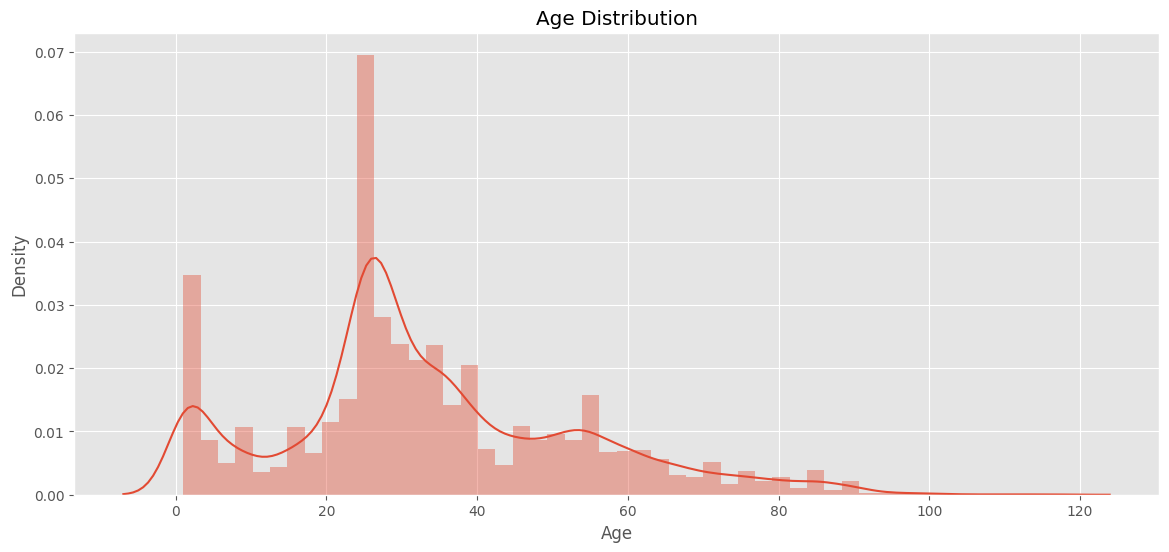

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.distplot(df["age"], ax=ax)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution")

plt.show()

In [15]:
pd.cut(
    df["age"],
    bins=[-np.inf, 17, 25, 35, 45, 55, np.inf],
    labels=["17 and under", "18-25", "26-35", "36-45", "46-55", "56+"],
).value_counts()

age
26-35           7470
17 and under    4233
18-25           3404
56+             3376
36-45           2988
46-55           2237
Name: count, dtype: int64

In [16]:
gender = {0:"Male", 1:"Female"}

In [17]:
df["age_category"] = pd.cut(df["age"], bins=[-np.inf, 17, 25, 35, 45, 55, np.inf], labels=["17 and under", "18-25", "26-35", "36-45", "46-55", "56+"])

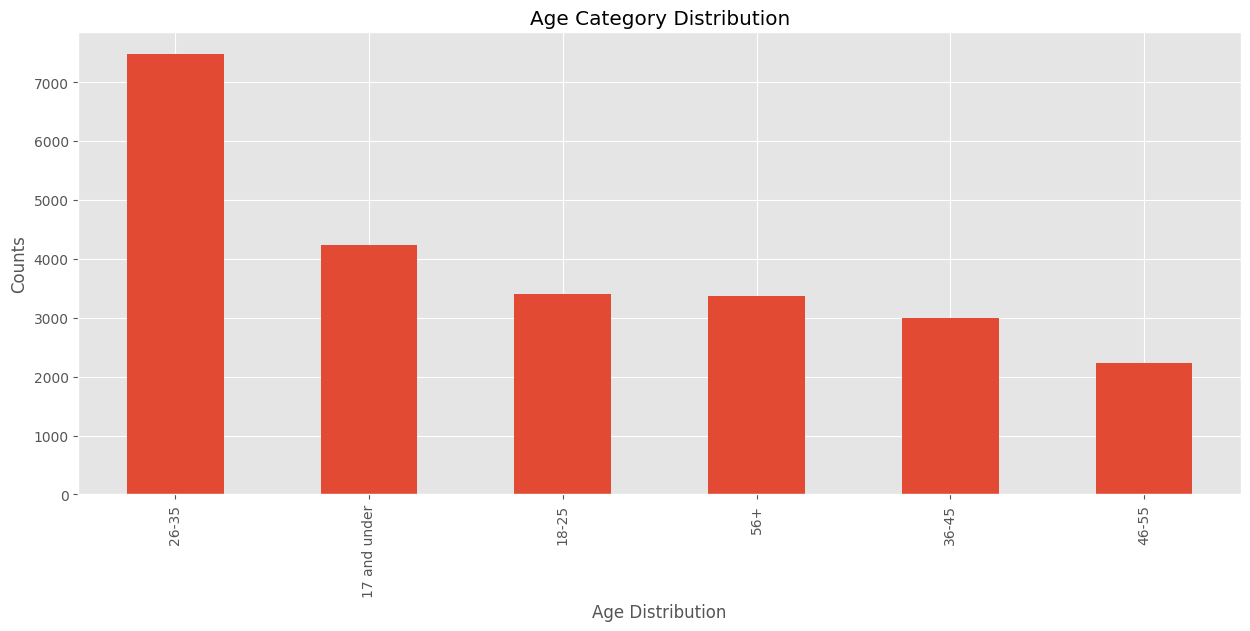

In [18]:
df["age_category"].value_counts().plot(kind="bar",
                                       title="Age Category Distribution",
                                       xlabel="Age Distribution",
                                       ylabel="Counts",
                                       figsize=(15, 6))
plt.show()

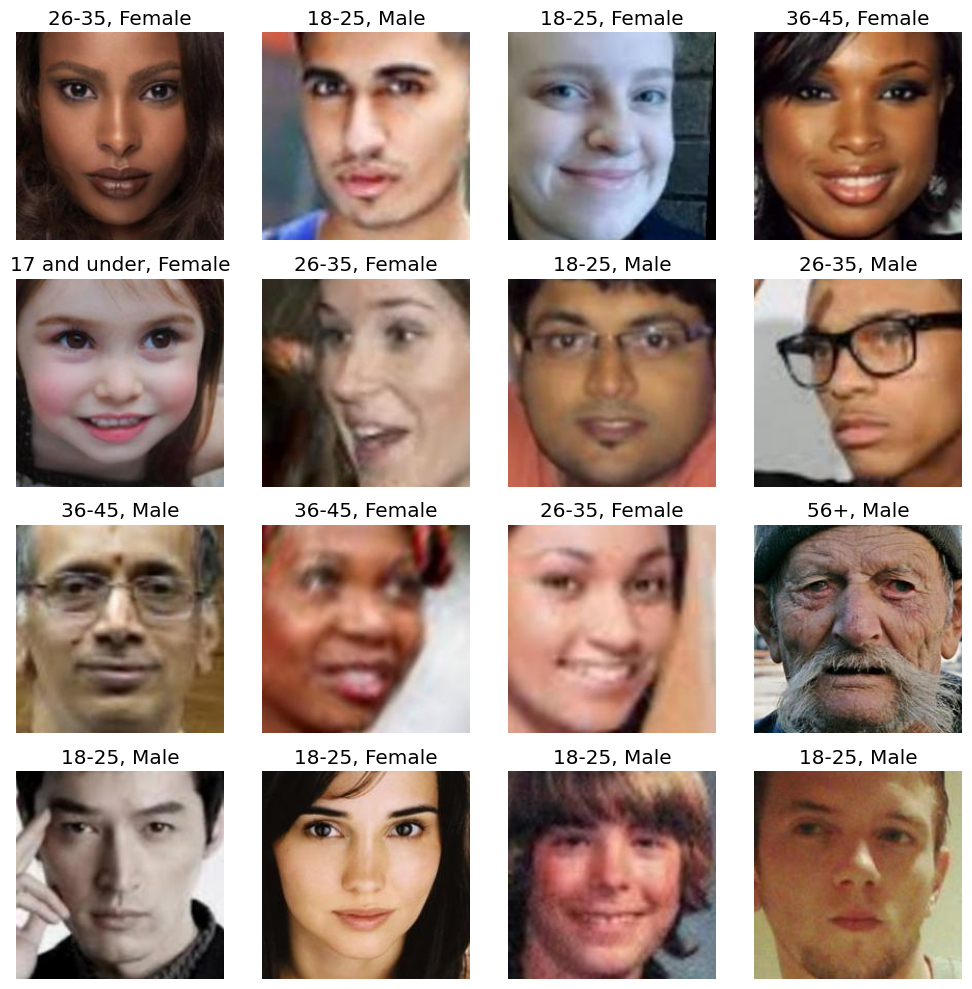

In [19]:
random_sample = np.random.randint(0, df.shape[0], 16)

plt.figure(figsize=(10, 10))
for index, i in enumerate(random_sample, start=1):
    plt.subplot(4, 4, index)
    loaded_image = img_to_array(load_img(df.loc[i, "images"]))/255
    plt.imshow(loaded_image)
    plt.title(f"{df.loc[i, 'age_category']}, {gender[df.loc[i, 'gender']]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [20]:
nrow, ncol = df.shape[0], df.shape[1]

In [21]:
nrow, ncol

(23708, 4)

In [22]:
df.isnull().sum()

images          0
age             0
gender          0
age_category    0
dtype: int64

In [23]:
df["age_category"].value_counts()

age_category
26-35           7470
17 and under    4233
18-25           3404
56+             3376
36-45           2988
46-55           2237
Name: count, dtype: int64

In [ ]:
for img, lbl in zip(df["images"], df["age_category"]):
  if lbl == "26-35":
    shutil.copy(src=img, dst="/content/drive/MyDrive/dataset/age_gender_dataset/26-35")
  elif lbl == "17 and under":
    shutil.copy(src=img, dst="/content/drive/MyDrive/dataset/age_gender_dataset/17 and under")
  elif lbl == "18-25":
    shutil.copy(src=img, dst="/content/drive/MyDrive/dataset/age_gender_dataset/18-25")
  elif lbl == "56+":
    shutil.copy(src=img, dst="/content/drive/MyDrive/dataset/age_gender_dataset/56+")
  elif lbl == "36-45":
    shutil.copy(src=img, dst="/content/drive/MyDrive/dataset/age_gender_dataset/36-45")
  elif lbl == "46-55":
    shutil.copy(src=img, dst="/content/drive/MyDrive/dataset/age_gender_dataset/46-55")
  else:
    continue

In [ ]:
for img, lbl in zip(df["images"], df["gender"]):
  if lbl == 0:
    shutil.copy(src=img, dst="/content/drive/MyDrive/dataset/Gender/Male")
  elif lbl == 1:
    shutil.copy(src=img, dst="/content/drive/MyDrive/dataset/Gender/Female")
  else:
    continue

## Data Loading

In [3]:
from hugsvision.dataio.VisionDataset import VisionDataset


age_xtrain, age_xtest, age_id2labels, age_label2id = VisionDataset.fromImageFolder(dataset="/kaggle/input/eddys-training-data/age_gender_dataset-20240315T080508Z-001/age_gender_dataset",
                                                                                   test_ratio=0.1,
                                                                                   balanced = True,
                                                                                   augmentation=True)

Split Datasets...
Balance train dataset...
The less represented label in train as 2061 occurrences
Size of train after balancing is 12366
Training Dataset Elements:  11129
+---------+--------------+-------+-------+-------+-------+------+-------+
| Dataset | 17 and under | 18-25 | 26-35 | 36-45 | 46-55 | 56+  | Total |
+---------+--------------+-------+-------+-------+-------+------+-------+
|  Train  |     1861     | 1844  | 1867  | 1856  | 1853  | 1848 | 11129 |
|  Test   |     200      |  217  |  194  |  205  |  208  | 213  | 1237  |
+---------+--------------+-------+-------+-------+-------+------+-------+


In [4]:
gender_xtrain, gender_xtest, gender_id2label, gender_label2id = VisionDataset.fromImageFolder(dataset="/kaggle/input/eddys-training-data/Gender-20240315T080440Z-001/Gender",
                                                                                              test_ratio=0.1,
                                                                                              balanced = True,
                                                                                              augmentation=True)

Split Datasets...
Balance train dataset...
The less represented label in train as 6812 occurrences
Size of train after balancing is 13624
Training Dataset Elements:  12261
+---------+--------+------+-------+
| Dataset | Female | Male | Total |
+---------+--------+------+-------+
|  Train  |  6136  | 6125 | 12261 |
|  Test   |  676   | 687  | 1363  |
+---------+--------+------+-------+


## Creating Age Transformer Model

In [ ]:
from hugsvision.nnet.VisionClassifierTrainer import VisionClassifierTrainer
from transformers import ViTFeatureExtractor, ViTForImageClassification
#from transformers import AutoModelForImageClassification, ViTImageProcessor
# from transformers import SegformerImageProcessor, SegformerForImageClassification

age_model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k",
                                                       ignore_mismatched_sizes=True,
                                                       num_labels=6,
                                                       id2label=age_id2labels,
                                                       label2id=age_label2id)

age_feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k", 
                                                            ignore_mismatched_sizes=True
                                                           )


age_trainer = VisionClassifierTrainer(output_dir= "/kaggle/working/models",
                                      model_name="age_model",
                                      model=age_model,
                                      feature_extractor=age_feature_extractor,
                                      max_epochs=10,
                                      batch_size=32,
                                      lr=1e-4,
                                      fp16=True,
                                      train=age_xtrain,
                                      test=age_xtest)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

{'0': '17 and under', '1': '18-25', '2': '26-35', '3': '36-45', '4': '46-55', '5': '56+'}
{'17 and under': '0', '18-25': '1', '26-35': '2', '36-45': '3', '46-55': '4', '56+': '5'}
Trainer builded!
Start Training!


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,No log,0.936869


In [ ]:
gender_model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", 
                                                         ignore_mismatched_sizes=True,
                                                         num_labels=2,
                                                         label2id=gender_label2id,
                                                         id2label=gender_id2label)

gender_feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k", 
                                                               ignore_mismatched_sizes=True)

gender_trainer = VisionClassifierTrainer(output_dir= "/content/drive/MyDrive/models",
                                          model_name="gender_model",
                                          model=gender_model,
                                          feature_extractor=gender_feature_extractor,
                                          max_epochs=10,
                                          batch_size=32,
                                          lr=1e-5, # 2e-5
                                          fp16=False,
                                          train=gender_xtrain,
                                          test=gender_xtest)

In [ ]:
true_val_age, pred_val_age = age_trainer.evaluate_f1_score()

In [ ]:
true_val_gender, pred_val_gender = gender_trainer.evaluate_f1_score()

In [2]:
from hugsvision.inference.VisionClassifierInference import VisionClassifierInference

path = "./out/MyKvasirV2Model/20_2021-08-20-01-46-44/model/"
img  = "../../../samples/kvasir_v2/dyed-lifted-polyps.jpg"

classifier = VisionClassifierInference(
    feature_extractor = ViTFeatureExtractor.from_pretrained(path),
    model = ViTForImageClassification.from_pretrained(path),
)

label = classifier.predict(img_path=img)
print("Predicted class:", label)